Conteo de NaN por columna:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


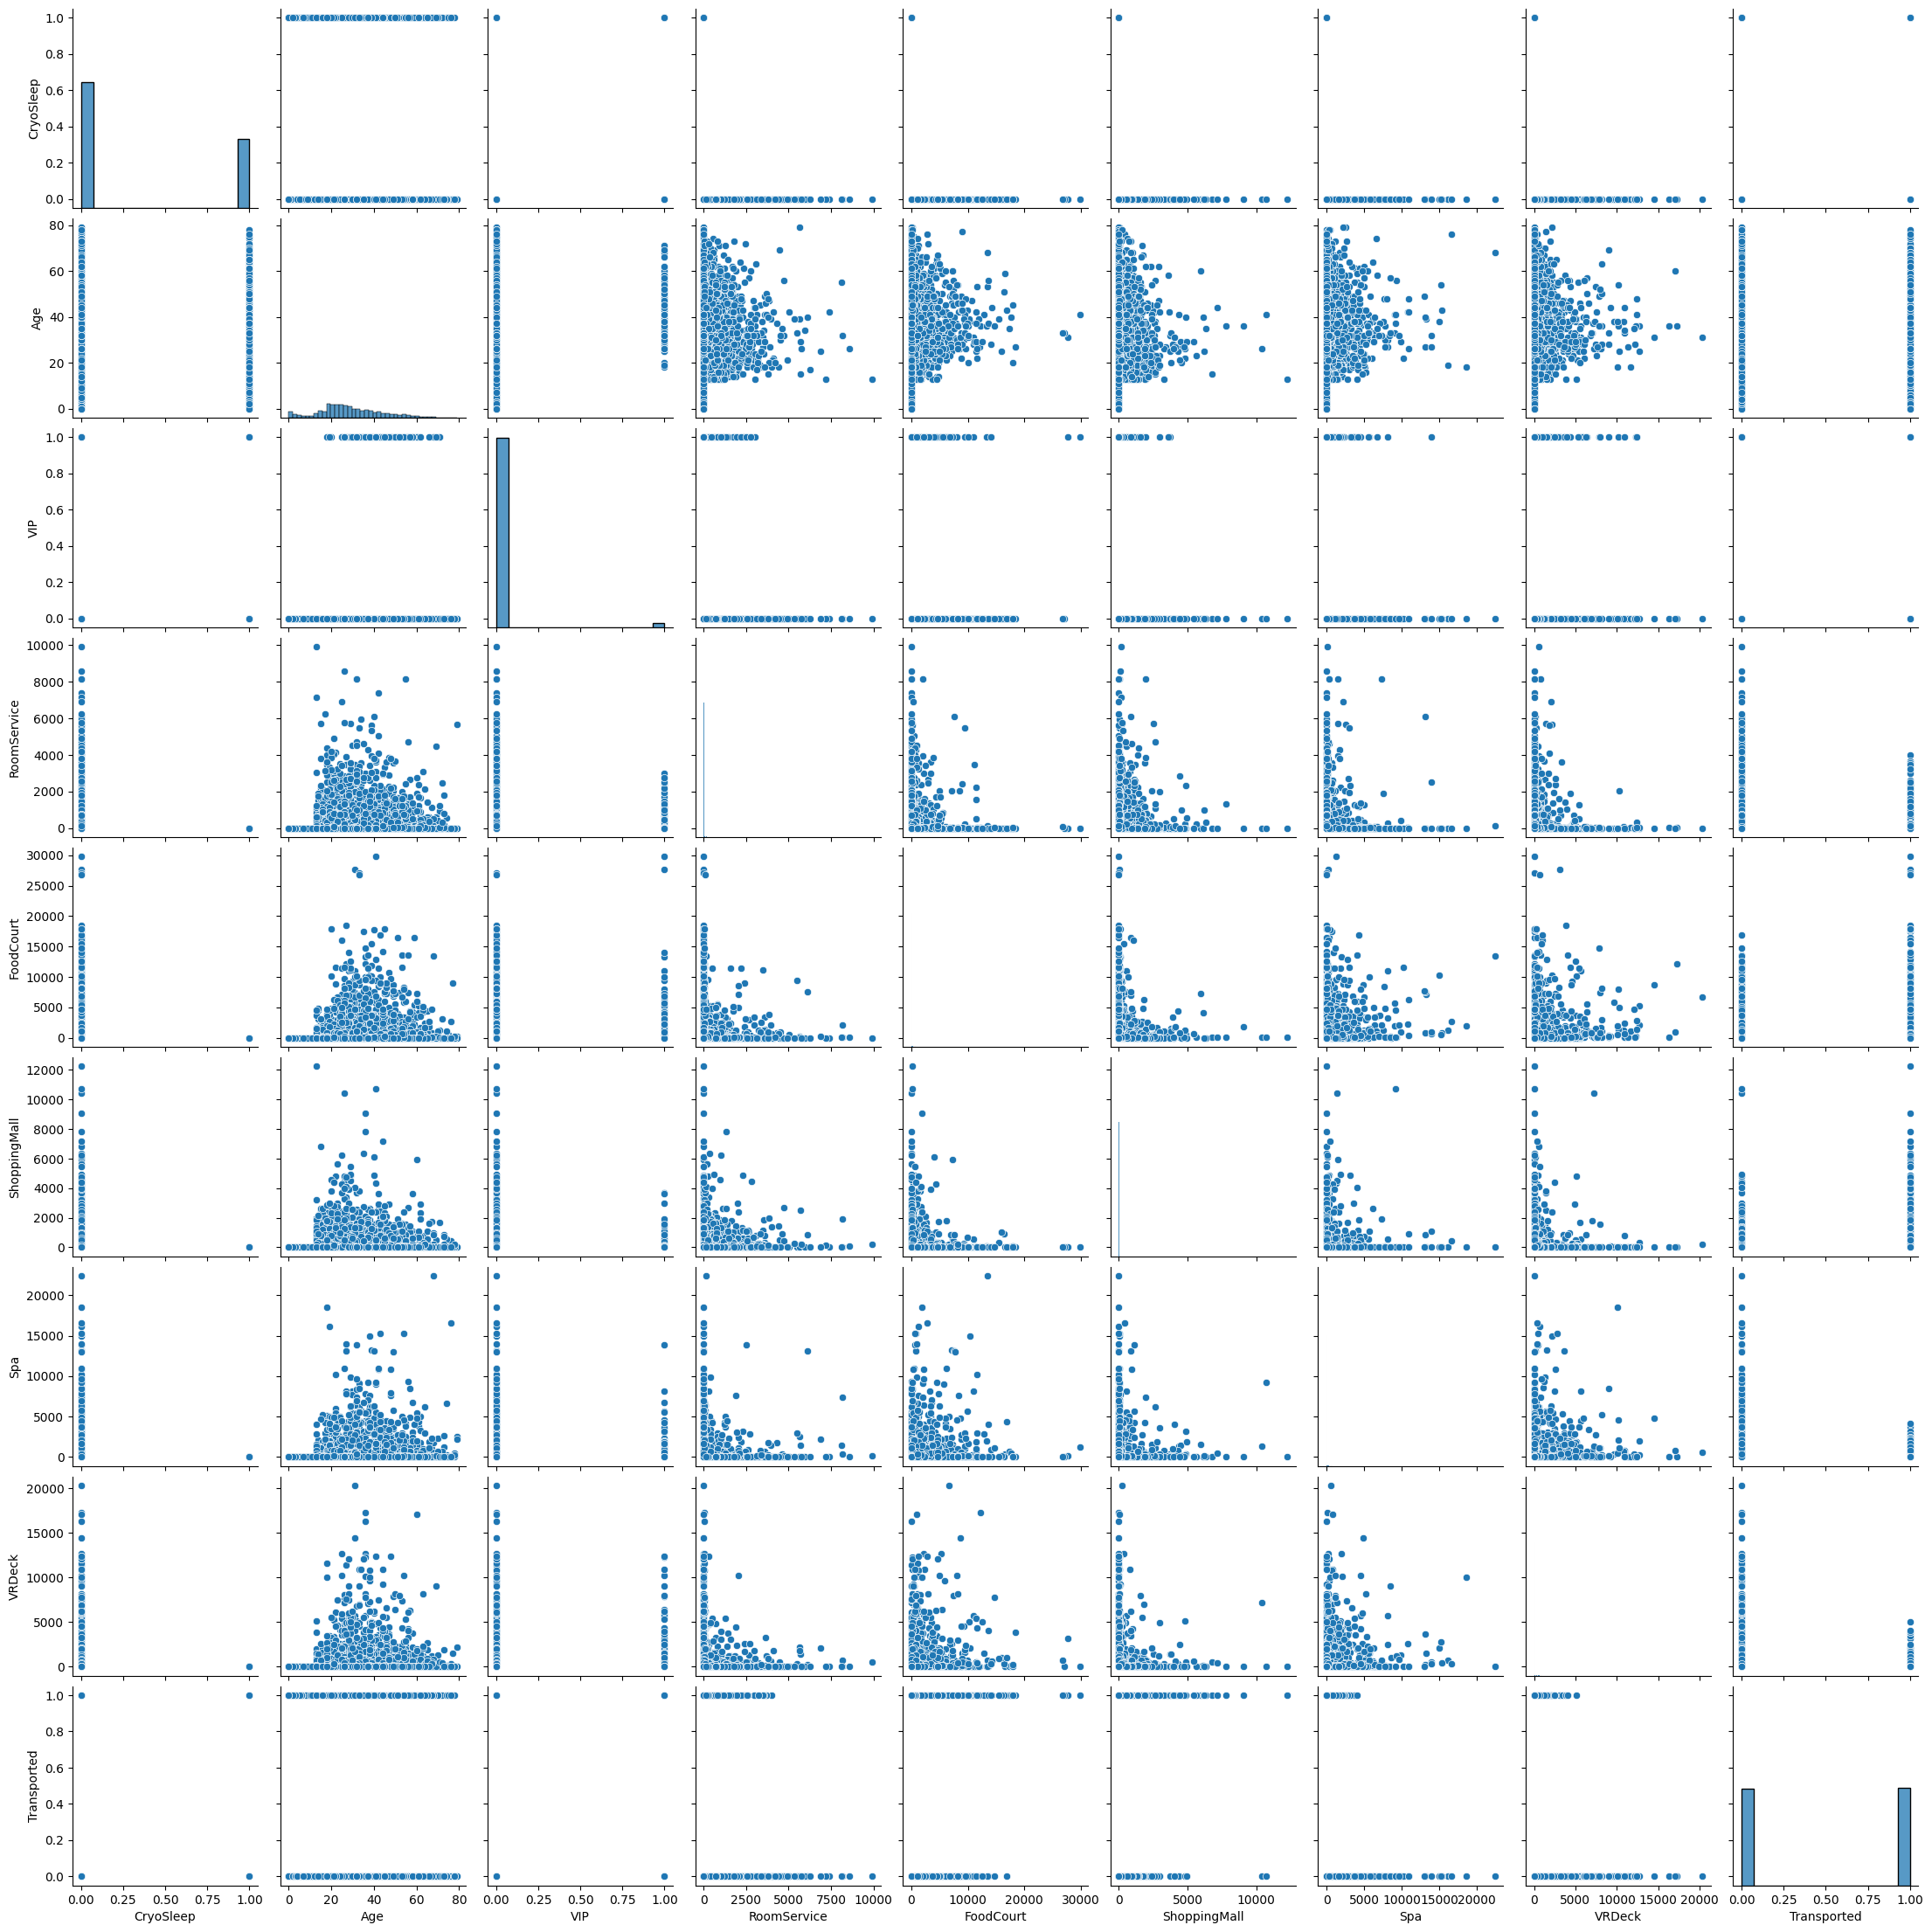

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on test dataset: 0.8092835519677094
Modelo guardado como model.pkl


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Funcion para cargar los csv
def cargar_datos(ruta_train, ruta_test):
    train_data = pd.read_csv(ruta_train)
    test_data = pd.read_csv(ruta_test)
    return train_data, test_data

#limpiar datos
def limpiar_datos(datos):
    datos_descrip = datos.describe()
    print("Conteo de NaN por columna:")
    print(datos.isnull().sum())
    datos_limp = datos.dropna()
    return datos_limp

#Ver los datos
def visualizar_atributos(datos):
    sns.pairplot(datos)
    plt.show()

# Dividir el dataset en train, test y cross validation
def dividir_dataset(datos):
    X = datos.drop('Transported', axis=1)
    y = datos['Transported']
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

#seleccionar las variables para la predicción
def seleccionar_variables(datos):
    X = datos[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
    return X

# ormalizar los datos de entrada
def normalizar_datos(X_train, X_valid, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_valid_scaled, X_test_scaled

# Entrenar el modelo con distintos valores del learning rate
def entrenar_modelo(X_train, y_train, X_valid, y_valid):
    learning_rates = [0.001, 0.01, 0.1]
    best_accuracy = 0
    best_learning_rate = None
    for rate in learning_rates:
        model = MLPClassifier(learning_rate_init=rate, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)
        accuracy = accuracy_score(y_valid, predictions)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_learning_rate = rate
    return best_learning_rate

# Entrenar el modelo final y realizar predicciones
def entrenar_modelo_final(X_train, y_train, X_test, learning_rate):
    model = MLPClassifier(learning_rate_init=learning_rate, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return predictions

# Función principal
def main():
    # Cargar los datos
    train_data, test_data = cargar_datos('train.csv', 'test.csv')

    # Limpiar los datos
    train_data_clean = limpiar_datos(train_data)

    #Ver los datos
    visualizar_atributos(train_data_clean)

    # Dividir el dataset
    X_train, X_valid, X_test, y_train, y_valid, y_test = dividir_dataset(train_data_clean)

    # Seleccionar variables
    X_train_selected = seleccionar_variables(X_train)
    X_valid_selected = seleccionar_variables(X_valid)
    X_test_selected = seleccionar_variables(X_test)

    # Normalizar los datos
    X_train_scaled, X_valid_scaled, X_test_scaled = normalizar_datos(X_train_selected, X_valid_selected, X_test_selected)

    # Entrenar el modelo con distintos valores del learning rate
    best_learning_rate = entrenar_modelo(X_train_scaled, y_train, X_valid_scaled, y_valid)

    # Entrenar el modelo final
    predictions = entrenar_modelo_final(X_train_scaled, y_train, X_test_scaled, best_learning_rate)

    # Testear el modelo entrenado sobre el dataset de testeo
    accuracy_test = accuracy_score(y_test, predictions)
    print("Accuracy on test dataset:", accuracy_test)

# Ejecutar la función principal
if __name__ == "__main__":
    main()

from joblib import dump

# Guardar el modelo
def guardar_modelo(modelo, nombre_archivo):
    dump(modelo, nombre_archivo)
    print(f"Modelo guardado como {nombre_archivo}")

guardar_modelo(entrenar_modelo_final, 'model.pkl' )


In [14]:
!python --version

Python 3.10.12
